نصوص آيات سورة 87:

  1 - سَبِّحِ اسْمَ رَبِّكَ الْأَعْلَى
  2 - الَّذِي خَلَقَ فَسَوَّىٰ
  3 - وَالَّذِي قَدَّرَ فَهَدَىٰ
  4 - وَالَّذِي أَخْرَجَ الْمَرْعَىٰ
  5 - فَجَعَلَهُ غُثَاءً أَحْوَىٰ
  6 - سَنُقْرِئُكَ فَلَا تَنسَىٰ
  7 - إِلَّا مَا شَاءَ اللَّهُ إِنَّهُ يَعْلَمُ الْجَهْرَ وَمَا يَخْفَىٰ
  8 - وَنُيَسِّرُكَ لِلْيُسْرَىٰ
  9 - فَذَكِّرْ إِن نَّفَعَتِ الذِّكْرَىٰ
 10 - سَيَذَّكَّرُ مَن يَخْشَىٰ
 11 - وَيَتَجَنَّبُهَا الْأَشْقَى
 12 - الَّذِي يَصْلَى النَّارَ الْكُبْرَىٰ
 13 - ثُمَّ لَا يَمُوتُ فِيهَا وَلَا يَحْيَىٰ
 14 - قَدْ أَفْلَحَ مَن تَزَكَّىٰ
 15 - وَذَكَرَ اسْمَ رَبِّهِ فَصَلَّىٰ
 16 - بَلْ تُؤْثِرُونَ الْحَيَوٰةَ الدُّنْيَا
 17 - وَالْءَاخِرَةُ خَيْرٌ وَأَبْقَىٰ
 18 - إِنَّ هَٰذَا لَفِي الصُّحُفِ الْأُولَىٰ
 19 - صُحُفِ إِبْرَٰهِيمَ وَمُوسَىٰ


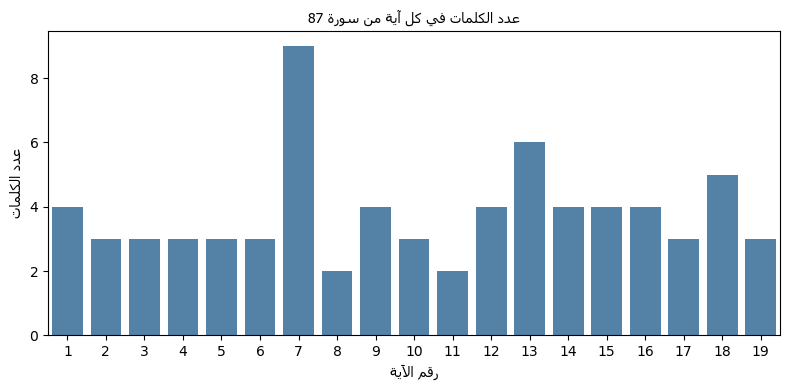

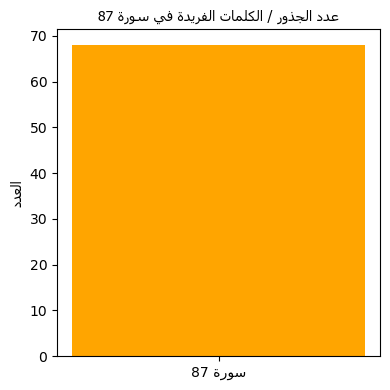

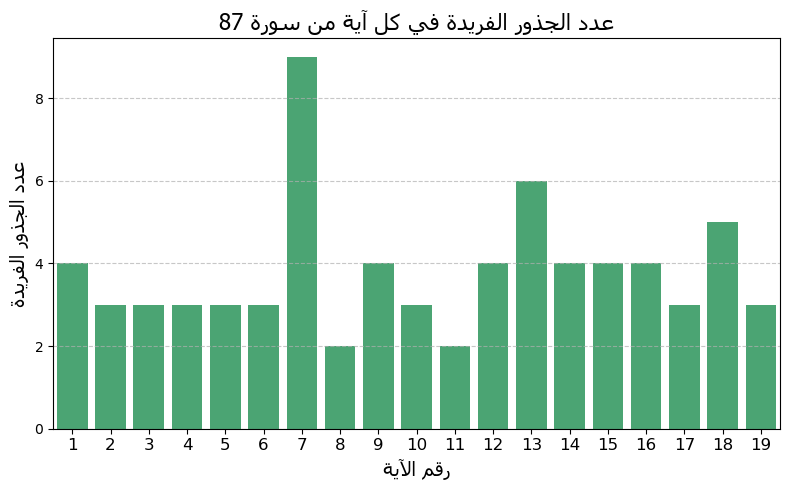

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.font_manager as fm

# تحميل قاعدة البيانات من ملف الإكسل
file_path = r"d:\AI-Quran\Week-1\77432_v3.xlsx"
df = pd.read_excel(file_path)

# تحميل خط يدعم العربية (عدّل المسار حسب جهازك)
arabic_font_path = r'C:\Windows\Fonts\tahoma.ttf'
arabic_font = fm.FontProperties(fname=arabic_font_path)

# دالة لتحويل النص العربي للعرض الصحيح (RTL)
def reshape_arabic_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    bidi_text = get_display(reshaped_text)
    return bidi_text

# -----------------------------
# 1. تحميل بيانات سورة الأعلى (رقم السورة = 87)
# -----------------------------
surah_number = 87
surah_df = df[df["رقم السورة"] == surah_number]

# -----------------------------
# 2. استخراج نصوص الآيات ووضعها في المقدمة
# -----------------------------
ayahs_df = (
    surah_df
    .sort_values(by=["رقم الاية في السورة", "رقم الكلمة بالسورة"])
    .groupby("رقم الاية في السورة")["الكلمة مع الهمزة"]
    .apply(lambda words: " ".join(words))
    .reset_index()
    .rename(columns={
        "رقم الاية في السورة": "رقم الآية",
        "الكلمة مع الهمزة": "نص الآية"
    })
)

print(f"نصوص آيات سورة {surah_number}:\n")
for _, row in ayahs_df.iterrows():
    print(f"{row['رقم الآية']:>3} - {row['نص الآية']}")

# -----------------------------
# 3. عدد الكلمات في كل آية (لون ثابت)
# -----------------------------
ayah_word_counts = surah_df.groupby("رقم الاية في السورة").size()

plt.figure(figsize=(8, 4))
sns.barplot(x=ayah_word_counts.index, y=ayah_word_counts.values, color="steelblue")
plt.title(reshape_arabic_text(f"عدد الكلمات في كل آية من سورة {surah_number}"), fontproperties=arabic_font)
plt.xlabel(reshape_arabic_text("رقم الآية"), fontproperties=arabic_font)
plt.ylabel(reshape_arabic_text("عدد الكلمات"), fontproperties=arabic_font)
plt.tight_layout()
plt.show()

# -----------------------------
# 4. رسم شريطي لعدد الجذور الفريدة في السورة (لون ثابت)
# -----------------------------
num_unique_roots = surah_df["الكلمة بدون همزة"].nunique()

plt.figure(figsize=(4, 4))
plt.bar(reshape_arabic_text(f"سورة {surah_number}"), num_unique_roots, color='orange')
plt.title(reshape_arabic_text(f"عدد الجذور / الكلمات الفريدة في سورة {surah_number}"), fontproperties=arabic_font)
plt.ylabel(reshape_arabic_text("العدد"), fontproperties=arabic_font)
plt.tight_layout()
plt.show()

# -----------------------------
# 5. عدد الجذور الفريدة في كل آية (لون ثابت)
# -----------------------------
unique_roots_per_ayah = surah_df.groupby("رقم الاية في السورة")["الكلمة بدون همزة"].nunique()

plt.figure(figsize=(8, 5))
sns.barplot(x=unique_roots_per_ayah.index, y=unique_roots_per_ayah.values, color="mediumseagreen")

plt.title(reshape_arabic_text(f"عدد الجذور الفريدة في كل آية من سورة {surah_number}"), fontproperties=arabic_font, fontsize=16)
plt.xlabel(reshape_arabic_text("رقم الآية"), fontproperties=arabic_font, fontsize=14)
plt.ylabel(reshape_arabic_text("عدد الجذور الفريدة"), fontproperties=arabic_font, fontsize=14)

plt.xticks(unique_roots_per_ayah.index - 1, [str(i) for i in unique_roots_per_ayah.index], rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
